In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
np.random.seed(seed=42)

def create_data():
    t = PolynomialFeatures(degree=6).fit_transform(np.linspace(-2,2,100).reshape(100,-1))
    t[:,1:] = MinMaxScaler(feature_range=(-2,2),copy=False).fit_transform(t[:,1:])
    l = lambda t_i: 2*np.sin(0.8*np.pi*t_i)
    data = l(t[:,1])
    noise = np.random.normal(0,0.1,size=np.shape(data))
    y = data+noise
    y= y.reshape(100,1)
    print("size of matrix t :")
    print(t.shape)
    print("size of matrix y: ")
    print(y.shape)
    return {'t':t,'y':y}



size of matrix t :
(100, 7)
size of matrix y: 
(100, 1)


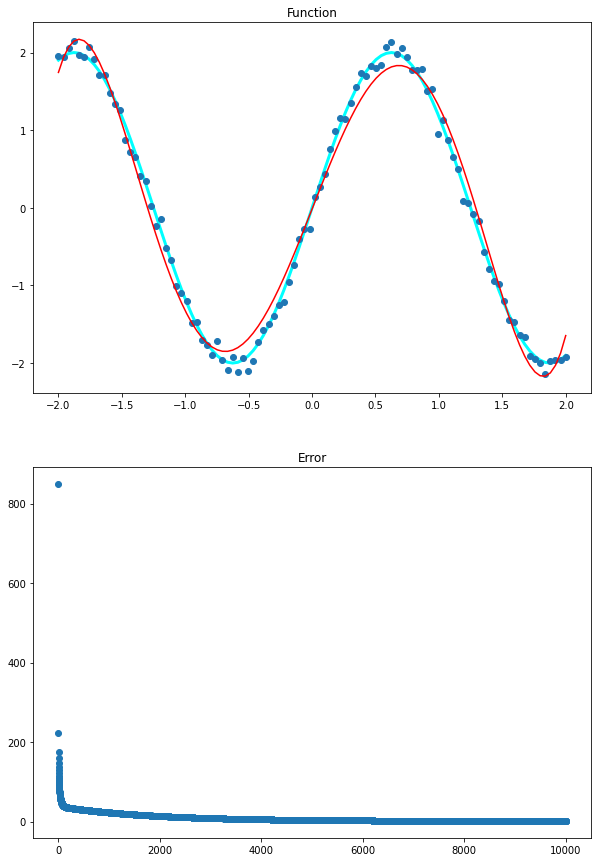

In [11]:

def plot_function(t,y,w,Error,w_s):
    fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,15))
    ax[0].plot(t[:,1],[2*np.sin(0.8*np.pi*t_i) for t_i in t[:,1]],c='cyan',linewidth=3,zorder=0)
    ax[0].scatter(t[:,1],y)
    ax[0].plot(t[:,1],np.dot(t,w), c = 'red')
    ax[0].set_title('Function')
    ax[1].scatter(range(iterations),Error)
    ax[1].set_title('Error')

# initialize variables
data = create_data()
t = data['t']
y = data['y']
w = np.random.normal(size=(np.shape(t)[1],1))
eta = 0.1
iterations = 10000
batch = 10


def batch_gradient_descent(t,y,w,eta):
    derivative = np.sum([-(y[d]-np.dot(w.T.copy(),t[d,:]))*t[d,:].reshape(np.shape(w)) for d in range(len(t))],axis=0)
    return eta*(1/len(t))*derivative


# Update w
w_s = []
Error = []
for i in range(iterations):
    # Calculate error
    error = (1/2)*np.sum([(y[i]-np.dot(w.T,t[i,:]))**2 for i in range(len(t))])
    Error.append(error)
    w -= batch_gradient_descent(t,y,w,eta)

# Plot the predicted function and the Error
plot_function(t,y,w,Error,w_s)